In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 3 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(20,10) )         # Image size


import warnings
warnings.filterwarnings('ignore')


In [3]:
favorites=pd.read_csv("favorites.csv")
favorites.head()

id  user_id     entityable_type  entityable_id           created_at  \
0   6       13  khishavere\Content             24  2018-09-30 15:04:25   
1   8       13  khishavere\Content             31  2018-10-07 03:25:36   
2   9       13  khishavere\Content             33  2018-10-08 04:26:38   
3  10       13  khishavere\Content             32  2018-10-08 19:08:12   
4  12        5  khishavere\Content             64  2018-10-13 18:14:29   

            updated_at  
0  2018-09-30 15:04:25  
1  2018-10-07 03:25:36  
2  2018-10-08 04:26:38  
3  2018-10-08 19:08:12  
4  2018-10-13 18:14:29

In [4]:
favorites.shape

(1925, 6)

In [5]:
#prints all possible values of a column 
favorites["entityable_id"].unique()

array([ 24,  31,  33,  32,  64,  38,  39,  89,  13,  37,  36,  29,  66,
        60,  65,  62,  61,  58,  57,  54,  53,  52,  48,  44,  43,  42,
        41,  34,  25,  22,  17,  80,  81,  85,  79,  23,  20,  15,  55,
        83,  35,  30,  28,  19,  18,  14,  56,  46, 106,  59, 107, 108,
        90,  68,  67, 109,  91,  86,  21,  16,  82,  93,  26,  45,  84,
       188, 170, 176, 184, 185, 187, 153, 175, 167, 152, 137, 151, 177,
       178, 179, 124, 123, 125, 169, 139, 113, 105,  97, 142, 130, 173,
       171, 166, 138, 131, 182, 168, 191, 180, 154, 155, 132,  95, 183,
       190, 192, 133, 103, 193, 101, 194, 195, 196, 197, 198, 158, 159,
       160, 161, 163, 201, 135, 202, 203, 204, 205, 199, 206, 164, 211,
       212, 213, 214, 174, 165, 215, 111, 157, 200, 118, 207, 216, 140,
       217, 218,  87, 221, 222, 224, 223, 110, 112, 141, 134, 136,  99,
       228, 230, 231, 232, 233, 229, 235, 236, 239, 240, 242, 237, 244,
       245, 246, 247], dtype=int64)

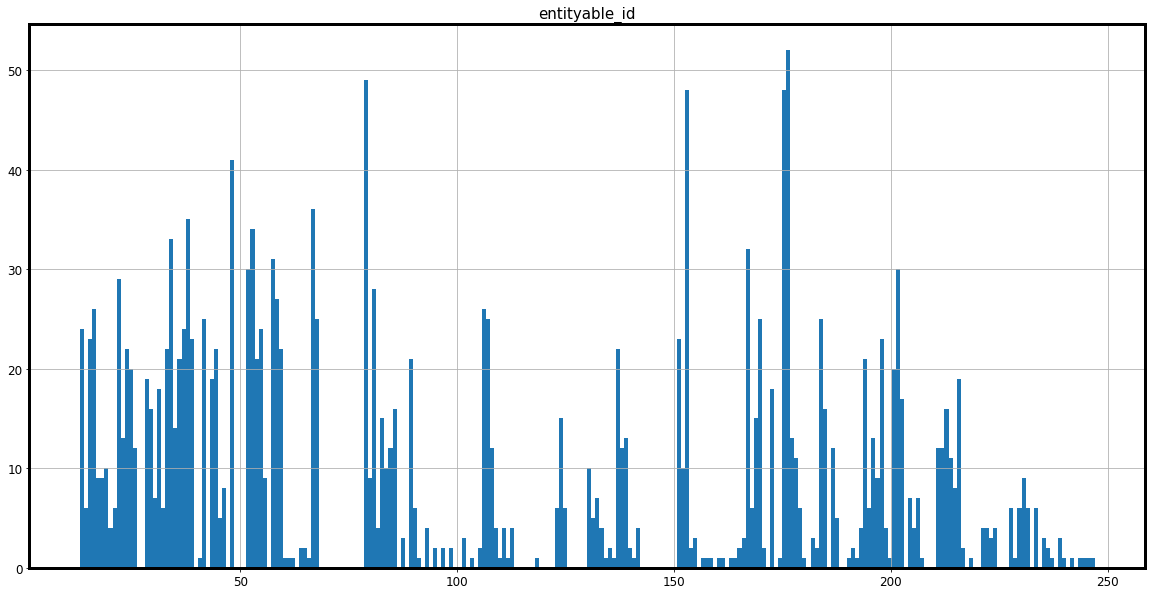

In [8]:
#histogram of the favorite contents with their frequencies
hist = favorites.hist( column='entityable_id',bins=250)

In [9]:
contents=pd.read_csv("contents.csv")
contents

id                                              title  \
0     13                       هنر شکست خوردن رتبه 39 کنکور   
1     14                          کیمیاگری دستور آشپزی نیست   
2     15                               کابوس اشتباهات گذشته   
3     16               شخصیت ایده آل مشکل اصلی برنامه ریزی!   
4     17               ثابت قدمی:کلیدموفقیت قهرمانهای کنکور   
5     18                       چرا ما از یه درس متنفر میشیم   
6     19                        نکنه این دفعه رتبم خوب نشه؟   
7     20                              المپیاد در رتبه کنکور   
8     21   وقتی تراز آزمونم چیزی که میخواستم نشد چه کار کنم   
9     22                                 چطور شیمی بخونیم!!   
10    23                    اهمیت داشتن رویا در کسب موفقیت!   
11    24         با بی دقتی های زیادم توی آزمون چه کار کنم؟   
12    25                          کشتی نجات کنکور شما چیست؟   
13    26  رتبه های برتر کنکور با چه ملاک هایی کلاس کنکور...   
14    28                                یازده و یازده دقیقه   
15    29       راز شخصیت رتبه های برتر(2): به آینه نگاه کن!   
16    30       راز موفقیت کم سن ترین دختر قهرمان شطرنج جهان   
17    31                         با مشکلات زندگیم چکار کنم؟   
18    32            چرا توی آزمون آزمایشی ترازم بالا نمیره؟   
19    33                     میزان ساعت مطالعه چقدر باشه؟؟؟   
20    34                                   انگیزه درس خوندن   
21    35                               در باب فشار کنکور...   
22    36  اگه از دهم/یازدهم شروع کنم به درس خوندن تا کنک...   
23    37           من اگه درس بخونم واقعا کنکور قبول میشم؟؟   
24    38               چرا درس خوندن انقدر خسته کننده است؟؟   
25    39          راز شخصیت رتبه های برتر(1): من ..یا ..ما؟   
26    42                        بهینه ترین روش مطالعه چیست؟   
27    43              چقدر درس بخونیم و چقدر استراحت کنیم؟؟   
28    44                تنبلی های خود را چگونه جبران کنیم؟؟   
29    45                     سی دی های آموزشی کنکور بخریم؟؟   
..   ...                                                ...   
165  217                              چرا تحلیل آزمون مهمه؟   
166  218  چرا درصد هام موقع تحلیل آزمون با درصد های کارن...   
167  219  چرا سوال رو غلط میزنیم ویا سوالی رو بی جواب می...   
168  220                  کارنامه آزمونم رو چطور تحلیل کنم؟   
169  221                               داستان موفق شدن چیه؟   
170  222         هم تیمی چه نقشی توی شکست و موفقیت تو داره؟   
171  223         وقتی رویاهات تحقق پیدا میکنه چه حسی داری؟?   
172  224                             راز موفقیت کلوئه کیم ?   
173  225  بنظرتون میشه از خلاصه های دوستامون یا معلم هام...   
174  226              چرا نمیتونم به خلاصه خودم اعتماد کنم؟   
175  227  اقا من تازه یادگرفتم چطور خلاصه نویسی کنم ،بنظ...   
176  228                                        آرش کمانگیر   
177  229                      منابع تست زنی نهم به دهم چیه؟   
178  230           منابع مورد استفاده در دهم به یازدهم چیه؟   
179  231          منابع مورد استفاده یازدهم به دوازدهم چیه؟   
180  232                  معایب و مزیت های آزمون گزینه دو ?   
181  233                     معایب و مزیت های آزمون قلم چی?   
182  234                        معایب و مزایای آزمون سنجش ?   
183  235                        معایب و مزیت های آزمون گاج?   
184  236                 چرا باید توی تابستون درس بخونیم ؟?   
185  237                  چند ساعت ؟ کدوم آزمون ؟کدوم کلاس؟   
186  238  برای خوندن و جمع بندی نهم از چه منابعی استفاده...   
187  239                                     تحلیل #دینی 98   
188  240                                      تحلیل#فیزیک98   
189  241                                تحلیل #زبان کنکور98   
190  242                                 تحلیل#زیست کنکور98   
191  244                               تحلیل #شیمی کنکور98?   
192  245                              تحلیل #ادبیات کنکور98   
193  246                               تحلیل #عربی کنکور 98   
194  247                               تحلیل #ریاضی کنکور98   

                                           description content_category  \
0    چطور وقتی کارناممون

In [10]:
contents["price"].unique()

array([   0, 3500, 5000, 3000, 1900, 2500, 1200, 1700, 2300, 1800, 3900,
       2900, 4500], dtype=int64)

In [11]:
id_price=contents[["id","price"]]
id_price=np.array(id_price)
id_price

array([[  13,    0],
       [  14,    0],
       [  15,    0],
       [  16,    0],
       [  17,    0],
       [  18,    0],
       [  19,    0],
       [  20,    0],
       [  21,    0],
       [  22,    0],
       [  23,    0],
       [  24,    0],
       [  25,    0],
       [  26,    0],
       [  28,    0],
       [  29,    0],
       [  30,    0],
       [  31,    0],
       [  32,    0],
       [  33,    0],
       [  34,    0],
       [  35,    0],
       [  36,    0],
       [  37,    0],
       [  38,    0],
       [  39,    0],
       [  42,    0],
       [  43,    0],
       [  44,    0],
       [  45,    0],
       [  46,    0],
       [  48,    0],
       [  52,    0],
       [  53,    0],
       [  54,    0],
       [  55,    0],
       [  56,    0],
       [  57,    0],
       [  58,    0],
       [  59,    0],
       [  67,    0],
       [  68,    0],
       [  79,    0],
       [  80,    0],
       [  81,    0],
       [  82,    0],
       [  83,    0],
       [  84,

In [13]:
favorites_id=favorites["entityable_id"]
favorites_id=np.array(favorites_id)

In [16]:
favorites_with_price=np.zeros((1925,2))
favorites_with_price[:,0]=favorites_id

for i in range(1925):
    for j in range(195):
        if favorites_with_price[i,0]==id_price[j,0]:
            favorites_with_price[i,1]=id_price[j,1]


In [17]:
favorites_with_price

array([[ 24.,   0.],
       [ 31.,   0.],
       [ 33.,   0.],
       ...,
       [137.,   0.],
       [ 39.,   0.],
       [247.,   0.]])

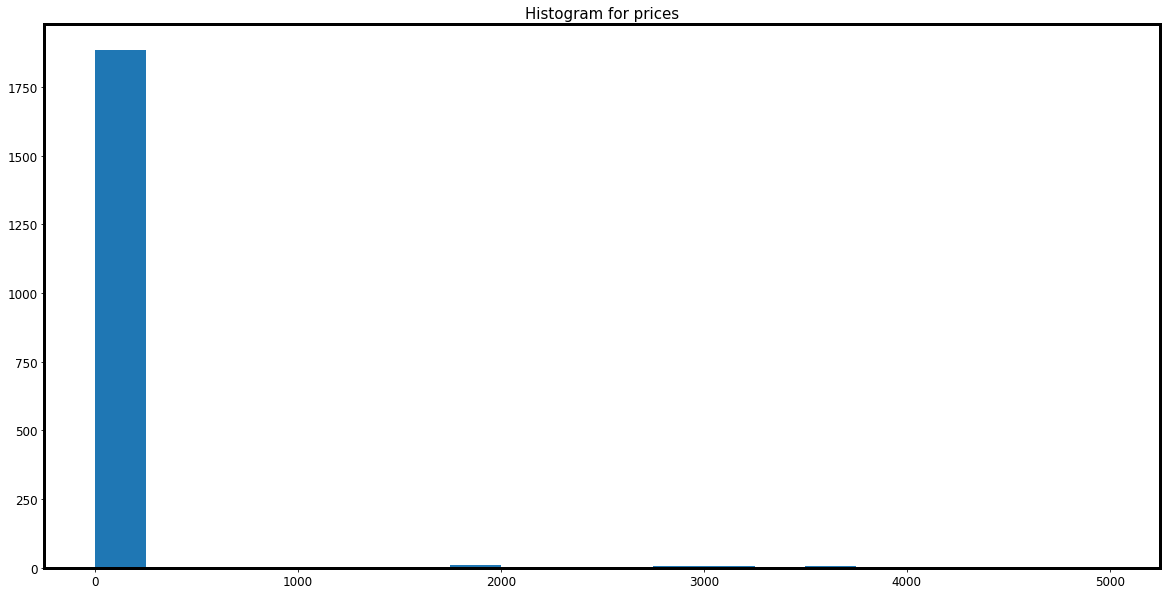

In [18]:
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000), rng.normal(loc=5, scale=2, size=1000)))
plt.hist(favorites_with_price[:,1], bins=20)  # arguments are passed to np.histogram
plt.title("Histogram for prices")
plt.show()